# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

In [68]:
full = pd.read_csv("C:\\Users\\user\\Desktop\\중간프로젝트\\의료패널 데이터\\a.csv")

In [4]:
full.shape

(4934, 160)

In [73]:
full["PHI_BENEFIT"] = np.exp(full["PHI_BENEFIT"])-1 

In [74]:
full[["PIDWON", "PHI_BENEFIT"]].sort_values("PIDWON")

,PIDWON,PHI_BENEFIT
0,11200301.0,186070.0
1852,11200301.0,60000.0
1853,11200302.0,5826420.0
1,11200302.0,841460.0
2,11201001.0,350000.0
...,...,...
4931,30008504.0,134379.0
4932,40000101.0,450000.0
1850,40000201.0,2960000.0
1851,40000802.0,1400000.0


# > RandomForestRegressor

In [6]:
# 전체 데이터
data = full.copy()

## 1. 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("PHI_BENEFIT", axis=1),
    data["PHI_BENEFIT"],
    test_size=0.2,
    random_state=42
)

## 2. 모델 훈련

In [29]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 생성
RF = RandomForestRegressor(random_state=42, max_depth=5)

# fit
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

## 3. 예측 및 평가

In [30]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train = RF.predict(X_train)
# 테스트 데이터에 대한 예측
y_pred_test = RF.predict(X_test)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 1.0812
RMSE: 1.0398
MAE: 0.7839
R² Score: 0.5277

--- Test Set Performance ---
MSE: 1.2346
RMSE: 1.1111
MAE: 0.8221
R² Score: 0.4722


# > GradientBoosting

In [10]:
# 전체 데이터
data = full.copy()

## 2. 모델 훈련

In [24]:
# 모델 객체 생성
from sklearn.ensemble import GradientBoostingRegressor

# n_estimators : 약한 학습기(Weak Learner)의 개수. 학습 횟수 = 경사하강법 수행 횟수
# learning_rate : 학습률. 에러(손실 - Loss)에 대한 가중치의 미분 값을 얼마나 반영할지에 대한 비율
#  - 너무 작으면 가중치의 갱신이 잘 이뤄지지 않는다.
#  - 너무 크면 가중치의 갱신이 폭팔적으로 이뤄져서 에러가 오히려 커질 가능성이 생긴다.
GB = GradientBoostingRegressor(
    max_depth=5,
    random_state=42)

In [25]:
# 모델 적합
GB.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

## 3. 예측 및 평가

In [26]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train = GB.predict(X_train)
# 테스트 데이터에 대한 예측
y_pred_test = GB.predict(X_test)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 0.6244
RMSE: 0.7902
MAE: 0.5986
R² Score: 0.7272

--- Test Set Performance ---
MSE: 1.1619
RMSE: 1.0779
MAE: 0.7802
R² Score: 0.5033


# > XGB

## 2. 모델 훈련

In [31]:
from xgboost import XGBRegressor

XGB = XGBRegressor(random_state=42, max_depth=3)

XGB.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## 3. 예측 및 평가

In [32]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train = XGB.predict(X_train)
# 테스트 데이터에 대한 예측
y_pred_test = XGB.predict(X_test)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 0.7474
RMSE: 0.8645
MAE: 0.6485
R² Score: 0.6735

--- Test Set Performance ---
MSE: 1.2133
RMSE: 1.1015
MAE: 0.7948
R² Score: 0.4813


# > lightGBM

In [35]:
# 모델 객체 생성
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(
    objective='regression',
    max_depth=5,
    random_state=42
)

# 모델 적합
LGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3087
[LightGBM] [Info] Number of data points in the train set: 3947, number of used features: 124
[LightGBM] [Info] Start training from score 12.900776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(max_depth=5, objective='regression', random_state=42)

In [36]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train = LGBM.predict(X_train)
# 테스트 데이터에 대한 예측
y_pred_test = LGBM.predict(X_test)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 0.7170
RMSE: 0.8468
MAE: 0.6257
R² Score: 0.6868

--- Test Set Performance ---
MSE: 1.1399
RMSE: 1.0677
MAE: 0.7817
R² Score: 0.5127


# > CatBoost

In [37]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 1.8/101.7 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 2.9/101.7 MB 6.7 MB/s eta 0:00:15
   - -------------------------------------- 4.2/101.7 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 5.0/101.7 MB 6.0 MB/s eta 0:00:17
   -- ------------------------------------- 6.0/101.7 MB 5.8 MB/s eta 0:00:17
   -- ------------------------------------- 7.6/101.7 MB 5.9 MB/s eta 0:00:16
   --- ------------------------------------ 8.4/101.7 MB 5.7 MB/s eta 0:00:17
   --- ------------------------------------ 9.4/101.7 MB 5.6 MB/s eta 0:00:17
   ---- ----------------------------------- 11.0/101.7 MB 5.8 MB/s eta 0:00:16
   ---- ----------------------------------- 12.6/101.7 MB 6.0 MB/s eta 0:00:15
   ----- ---------------------------------- 13.6/101.7 MB 5.8 MB/s eta 0:00:16
   ----- ---------------------------------- 14.4/101.7 MB 5.7 MB/s e

In [49]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=42, depth=3)
cat.fit(X_train, y_train)

Learning rate set to 0.050862
0:	learn: 1.4886189	total: 1.2ms	remaining: 1.2s
1:	learn: 1.4672207	total: 3.9ms	remaining: 1.95s
2:	learn: 1.4481963	total: 6.16ms	remaining: 2.05s
3:	learn: 1.4294060	total: 7.94ms	remaining: 1.98s
4:	learn: 1.4114461	total: 10.2ms	remaining: 2.02s
5:	learn: 1.3958309	total: 11.4ms	remaining: 1.9s
6:	learn: 1.3806457	total: 12.8ms	remaining: 1.82s
7:	learn: 1.3672094	total: 14.3ms	remaining: 1.77s
8:	learn: 1.3559338	total: 15.6ms	remaining: 1.72s
9:	learn: 1.3440678	total: 16.8ms	remaining: 1.66s
10:	learn: 1.3319970	total: 18.4ms	remaining: 1.65s
11:	learn: 1.3207409	total: 19.9ms	remaining: 1.64s
12:	learn: 1.3110891	total: 21.3ms	remaining: 1.61s
13:	learn: 1.3007423	total: 22.6ms	remaining: 1.59s
14:	learn: 1.2909399	total: 23.9ms	remaining: 1.57s
15:	learn: 1.2822024	total: 25.8ms	remaining: 1.58s
16:	learn: 1.2748632	total: 27.2ms	remaining: 1.57s
17:	learn: 1.2662244	total: 28.5ms	remaining: 1.55s
18:	learn: 1.2588888	total: 29.7ms	remaining: 1.

In [50]:
# 예측
# 학습 데이터에 대한 예측
y_pred_train = cat.predict(X_train)
# 테스트 데이터에 대한 예측
y_pred_test = cat.predict(X_test)

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 성능 지표 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# 테스트 데이터 성능 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# 결과 출력
print("--- Training Set Performance ---")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}\n")
print("--- Test Set Performance ---")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

--- Training Set Performance ---
MSE: 0.8212
RMSE: 0.9062
MAE: 0.6831
R² Score: 0.6413

--- Test Set Performance ---
MSE: 1.1874
RMSE: 1.0897
MAE: 0.7989
R² Score: 0.4924


# 피처 중요도 확인

In [61]:
# 피쳐 중요도 확인
feature_importances = RF.feature_importances_
feature_names = data.drop("PHI_BENEFIT", axis=1).columns

# 피쳐 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

          Feature  Importance
28         H_INC7    0.659365
114           AGE    0.092056
130     INMED_CNR    0.075166
20          H_OOP    0.053306
119       OOP_TOT    0.014406
..            ...         ...
121      CARE_TOT    0.000000
122         WT_MG    0.000000
8        PHI4_4_D    0.000000
72   DISA_TY_13.0    0.000000
158  OUORT_DZ_9.0    0.000000

[159 rows x 2 columns]


In [66]:
importance_df_head = importance_df.head(10)

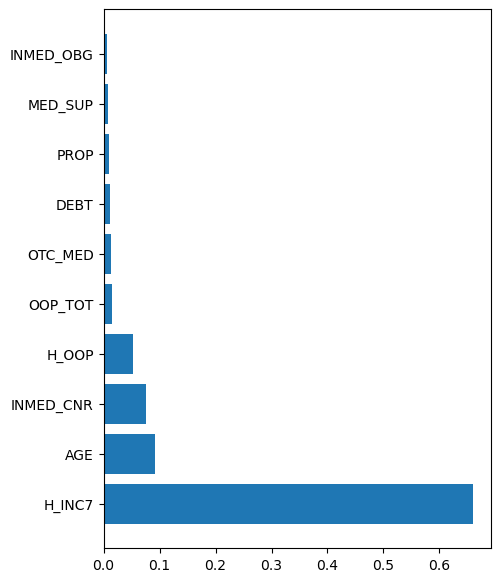

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 7))
plt.barh(importance_df_head["Feature"], importance_df_head["Importance"])
plt.show()